# The Evolution of the Marvel Cinematic Universe

## By Jennifer Zheng

Since its inception in 2008, the Marvel Cinematic Universe has become one of the largest movie franchises in the world, garnering a huge fan base and building an incredibly complex world throughout a single, cohesive narrative. Through this data story, I hope to capture how the MCU has changed over time from its first phase to its most recently completed phase: phase 3. 

In [697]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
from datetime import datetime
from matplotlib.lines import Line2D
from wordcloud import WordCloud

## Retrieving the Data

I will be using 3 datasets obtained from Kaggle. The first one, `movies_metadata.csv`, contains a collection of around 45,000 movies released on or before July 2017 with data on genre, release date, runtime, revenue, production companies, and more. The second one, `credits.csv`, contains both cast and crew credits for each movie in `movies_metadata.csv`. The third and main dataset I will be using is `mcu dataset.csv`, which has information about every Marvel movie from phases 1-3.

Let's open my datasets and gather the information that I need.

In [698]:
all_movies = pd.read_csv('movies_metadata.csv')
all_movies.head()

C:\Users\jennz\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [699]:
credits = pd.read_csv('credits.csv')
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [700]:
mcu = pd.read_csv("mcu dataset.csv")
mcu

,Name,US release Date,Director,Producer,Duration,Genre,IMDB rating,metascore,Cast,Budget,Domestic Gross,Total Gross,Opening Gross,Oscar Nomination,Oscar won,Phase
0,Iron Man,"May 2, 2008",Jon Favreau,Avi Arad and Kevin Feige,2h 6min,"Action , Adventure, Sci-Fi",7.9,79,"Robert Downey Jr. , Gweneth Paltrow , Terrence...","$140,000,000","$318,604,126","$585,366,247","$98,618,668",2,0,1
1,The incredible Hulk,"June 13, 2008",Louis Leterrier,"Avi Arad ,Gale Ann Hurd and Kevin Feige",1h 52min,"Action , Adventure, Sci-Fi",6.6,61,"Edward Norton , Liv Tyler , Tim Roth","$150,000,000","$134,806,913","$264,770,996","$55,414,050",0,0,1
2,Iron Man 2,"May 7, 2010",Jon Favreau,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",7.0,57,"Robert Downey Jr. , Gweneth Paltrow , Mickey R...","$200,000,000","$312,433,331","$623,933,331","$128,122,480",1,0,1
3,Thor,"May 6, 2011",Kenneth Branagh,Kevin Feige,1h 55min,"Action , Adventure, Fantasy",7.0,57,"Chris Hemsworth , Anthony Hopkins , Natalie Po...","$150,000,000","$181,030,624","$449,326,618","$65,723,338",0,0,1
4,Captain America: The first Avenger,"July 22, 2011",Joe Jhonston,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",6.9,66,"Chris Evans , Hugo Weaving , Samuel L. Jackson","$140,000,000","$176,654,505","$370,569,774","$65,058,524",0,0,1
5,Marvel's the Avengers,"May 4, 2012",Joss Whedon,Kevin Feige,2h 23min,"Action , Adventure, Sci-Fi",8.0,69,"Robert Downey Jr. , Chris Evans , Scarlett Joh...","$220,000,000","$623,357,910","$1,518,812,988","$207,438,708",1,0,1
6,Iron Man 3,"May 3, 2013",Shane Black,Kevin Feige,2h 10min,"Action , Adventure, Sci-Fi",7.1,62,"Robert Downey Jr. , Gweneth Paltrow , Guy Pearce","$200,000,000","$408,992,272","$1,214,811,252","$174,144,585",1,0,2
7,Thor: The dark world,"November 8, 2013",Alan Taylor,Kevin Feige,1h 52min,"Action , Adventure, Fantasy",6.8,54,"Chris Hemsworth , Natalie Portman , Tom Hiddl...","$170,000,000","$206,362,140","$644,783,140","$85,737,841",0,0,2
8,Captain America : The Winter Soldier,"April 4, 2014",Anthony and Joe Russo,Kevin Feige,2h 16min,"Action , Adventure, Sci-Fi",7.7,70,"Chris Evans , Scarlett Johansson , Samuel L. J...","$170,000,000","$259,746,958","$714,421,503","$95,023,721",1,0,2
9,Guardians Of the Galaxy,"August 1, 2014",James Gunn,Kevin Feige,2h 1min,"Action, Adventure , Comedy",8.0,76,"Chris Patt , Vin Diesel , Bradely Cooper","$170,000,000","$333,714,112","$772,776,600","$94,320,883",2,0,2


Note that some of the Marvel movies are not formatted correctly or use different names than what is typically used (such as Marvel's The Avengers). Let's fix that so we can compare titles with the `movies_metadata.csv` dataset!

In [701]:
mcu.loc[1, 'Name'] = 'The Incredible Hulk'
mcu.loc[4, 'Name'] = 'Captain America: The First Avenger'
mcu.loc[5, 'Name'] = 'The Avengers'
mcu.loc[7, 'Name'] = 'Thor: The Dark World'
mcu.loc[8, 'Name'] = 'Captain America: The Winter Soldier'
mcu.loc[9, 'Name'] = 'Guardians of the Galaxy'
mcu.loc[10, 'Name'] = 'Avengers: Age of Ultron'
mcu.loc[13, 'Name'] = 'Doctor Strange'
mcu.loc[16, 'Name'] = 'Thor: Ragnarok'
mcu.loc[20, 'Name'] = 'Captain Marvel'
mcu.loc[21, 'Name'] = 'Avengers: Endgame'
mcu.loc[22, 'Name'] = 'Spider-Man: Far From Home'

Now, I'm going to get the movie ids from `movies_metadata.csv` to the MCU dataset.

In [702]:
# Create columns for the additional data
mcu['id'] = 0

In [703]:
for n in mcu['Name']:
    query = all_movies[all_movies.title == n] # Gets all movies with title n
    
    # Takes care of the possibility of there being more than one movie with the same name
    for i in query.index:
        
        # Check if one of movie's production companies is Marvel Studios
        if "Marvel Studios" in query.loc[i, "production_companies"]:
            row = query.loc[i] # The correct movie is stored here
            
            # add id to mcu dataframe
            x = mcu["Name"] == n
            mcu.loc[mcu.index[x], 'id'] = int(row['id'])
mcu.head()

,Name,US release Date,Director,Producer,Duration,Genre,IMDB rating,metascore,Cast,Budget,Domestic Gross,Total Gross,Opening Gross,Oscar Nomination,Oscar won,Phase,id
0,Iron Man,"May 2, 2008",Jon Favreau,Avi Arad and Kevin Feige,2h 6min,"Action , Adventure, Sci-Fi",7.9,79,"Robert Downey Jr. , Gweneth Paltrow , Terrence...","$140,000,000","$318,604,126","$585,366,247","$98,618,668",2,0,1,1726
1,The Incredible Hulk,"June 13, 2008",Louis Leterrier,"Avi Arad ,Gale Ann Hurd and Kevin Feige",1h 52min,"Action , Adventure, Sci-Fi",6.6,61,"Edward Norton , Liv Tyler , Tim Roth","$150,000,000","$134,806,913","$264,770,996","$55,414,050",0,0,1,1724
2,Iron Man 2,"May 7, 2010",Jon Favreau,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",7.0,57,"Robert Downey Jr. , Gweneth Paltrow , Mickey R...","$200,000,000","$312,433,331","$623,933,331","$128,122,480",1,0,1,10138
3,Thor,"May 6, 2011",Kenneth Branagh,Kevin Feige,1h 55min,"Action , Adventure, Fantasy",7.0,57,"Chris Hemsworth , Anthony Hopkins , Natalie Po...","$150,000,000","$181,030,624","$449,326,618","$65,723,338",0,0,1,10195
4,Captain America: The First Avenger,"July 22, 2011",Joe Jhonston,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",6.9,66,"Chris Evans , Hugo Weaving , Samuel L. Jackson","$140,000,000","$176,654,505","$370,569,774","$65,058,524",0,0,1,1771


Okay, now let's add the cast and crew information found in `credits.csv` by using the movie ids. First, I created two functions that will help us remove the ids and other unnecessary information from the credits. Then, I get the credits from the dataset, use the functions on them, and add them to the MCU dataset.

In [704]:
def cleanCastCredits(info):
    """ Remove ids and other unnecessary information from the cast credits
    
    Keyword Arguments:
    info -- a string containing the credits of the cast
    """
    
    lst = info.split("\'")
    creds = {}
    index = 0
    
    # Add each character and its gender and actor to the dictionary
    for i in range(lst.count('character')):
        index = lst.index('character', index+1) # index+1 allows program to search for next 'character'
        
        # Keeps the apostrophe if it is part of the character name
        if len(lst[index+1]) > 2:
            lst[index+2] = lst[index+1][3:] + "'" + lst[index+2]
            
        # Keeps the apostrophe if it is part of the actor's name
        if len(lst[index+13]) > 2:
            lst[index+14] = lst[index+13][3:] + "'" + lst[index+14]
            
        creds[lst[index+2]] = {'gender': lst[index+9].strip(': ,'), 'actor': lst[index+14]}
        
    return [creds]

def cleanCrewCredits(info):
    """ Remove ids and other unnecessary information from the crew credits
    
    Keyword Arguments:
    info -- a string containing the credits of the crew
    """
    
    lst = info.split("'")
    creds = {}
    index = 0
    
    # Add each crew member and their gender, department, and job to the dictionary
    for i in range(lst.count('name')):
        index = lst.index('name', index+1) # index+1 allows program to search for next 'name'
        
        # Keeps the apostrophe if it is part of the name
        if len(lst[index+1]) > 2:
            lst[index+2] = lst[index+1][3:] + "'" + lst[index+2]
        
        creds[lst[index+2]] = {'gender': lst[index-7].strip(': ,'), 'department': lst[index-10], 'job': lst[index-2]}
        
    return [creds]

In [705]:
# New columns
mcu['cast'] = None
mcu['crew'] = None

for iD in mcu['id']:
    # movie has no id --> do nothing
    if iD == 0:
        continue
        
    query = credits[credits.id == int(iD)] # gets the credits that match with the id
    
    index = query.index[0] # row index of credits

    # add cast and crew info to dataframe
    x = mcu['id'] == int(iD)
    mcu.loc[mcu.index[x], 'cast'] = cleanCastCredits(query.loc[index, 'cast'])
    mcu.loc[mcu.index[x], 'crew'] = cleanCrewCredits(query.loc[index, 'crew'])
mcu

,Name,US release Date,Director,Producer,Duration,Genre,IMDB rating,metascore,Cast,Budget,Domestic Gross,Total Gross,Opening Gross,Oscar Nomination,Oscar won,Phase,id,cast,crew
0,Iron Man,"May 2, 2008",Jon Favreau,Avi Arad and Kevin Feige,2h 6min,"Action , Adventure, Sci-Fi",7.9,79,"Robert Downey Jr. , Gweneth Paltrow , Terrence...","$140,000,000","$318,604,126","$585,366,247","$98,618,668",2,0,1,1726,"{'Tony Stark / Iron Man': {'gender': '2', 'act...","{'Sarah Finn': {'gender': '1', 'department': '..."
1,The Incredible Hulk,"June 13, 2008",Louis Leterrier,"Avi Arad ,Gale Ann Hurd and Kevin Feige",1h 52min,"Action , Adventure, Sci-Fi",6.6,61,"Edward Norton , Liv Tyler , Tim Roth","$150,000,000","$134,806,913","$264,770,996","$55,414,050",0,0,1,1724,"{'Bruce Banner / The Hulk': {'gender': '2', 'a...","{'Gale Anne Hurd': {'gender': '1', 'department..."
2,Iron Man 2,"May 7, 2010",Jon Favreau,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",7.0,57,"Robert Downey Jr. , Gweneth Paltrow , Mickey R...","$200,000,000","$312,433,331","$623,933,331","$128,122,480",1,0,1,10138,"{'Tony Stark / Iron Man': {'gender': '2', 'act...","{'Justin Theroux': {'gender': '2', 'department..."
3,Thor,"May 6, 2011",Kenneth Branagh,Kevin Feige,1h 55min,"Action , Adventure, Fantasy",7.0,57,"Chris Hemsworth , Anthony Hopkins , Natalie Po...","$150,000,000","$181,030,624","$449,326,618","$65,723,338",0,0,1,10195,"{'Thor Odinson': {'gender': '2', 'actor': 'Chr...","{'Paul Rubell': {'gender': '2', 'department': ..."
4,Captain America: The First Avenger,"July 22, 2011",Joe Jhonston,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",6.9,66,"Chris Evans , Hugo Weaving , Samuel L. Jackson","$140,000,000","$176,654,505","$370,569,774","$65,058,524",0,0,1,1771,{'Steve Rogers / Captain America': {'gender': ...,"{'Alan Silvestri': {'gender': '2', 'department..."
5,The Avengers,"May 4, 2012",Joss Whedon,Kevin Feige,2h 23min,"Action , Adventure, Sci-Fi",8.0,69,"Robert Downey Jr. , Chris Evans , Scarlett Joh...","$220,000,000","$623,357,910","$1,518,812,988","$207,438,708",1,0,1,24428,"{'Tony Stark / Iron Man': {'gender': '2', 'act...","{'Alan Silvestri': {'gender': '2', 'department..."
6,Iron Man 3,"May 3, 2013",Shane Black,Kevin Feige,2h 10min,"Action , Adventure, Sci-Fi",7.1,62,"Robert Downey Jr. , Gweneth Paltrow , Guy Pearce","$200,000,000","$408,992,272","$1,214,811,252","$174,144,585",1,0,2,68721,"{'Tony Stark / Iron Man': {'gender': '2', 'act...","{'Shane Black': {'gender': '2', 'department': ..."
7,Thor: The Dark World,"November 8, 2013",Alan Taylor,Kevin Feige,1h 52min,"Action , Adventure, Fantasy",6.8,54,"Chris Hemsworth , Natalie Portman , Tom Hiddl...","$170,000,000","$206,362,140","$644,783,140","$85,737,841",0,0,2,76338,"{'Thor': {'gender': '2', 'actor': 'Chris Hemsw...","{'Priscilla John': {'gender': '1', 'department..."
8,Captain America: The Winter Soldier,"April 4, 2014",Anthony and Joe Russo,Kevin Feige,2h 16min,"Action , Adventure, Sci-Fi",7.7,70,"Chris Evans , Scarlett Johansson , Samuel L. J...","$170,000,000","$259,746,958","$714,421,503","$95,023,721",1,0,2,100402,{'Steve Rogers / Captain America': {'gender': ...,"{'Sarah Finn': {'gender': '1', 'department': '..."
9,Guardians of the Galaxy,"August 1, 2014",James Gunn,Kevin Feige,2h 1min,"Action, Adventure , Comedy",8.0,76,"Chris Patt , Vin Diesel , Bradely Cooper","$170,000,000","$333,714,112","$772,776,600","$94,320,883",2,0,2,118340,"{'Peter Quill / Star-Lord': {'gender': '2', 'a...","{'Craig Wood': {'gender': '2', 'department': '..."


It looks like all movies up to _Guardians of the Galaxy Vol. 2_ + _Thor: Ragnarok_ has been completely taken care of. As for the rest of the movies, I have manually created a dataset called `missing_credits.csv` from IMDb that will fill in the blanks. The cast list will include all major characters in the movie, but the crew list will only have the director(s) and producer(s) since I would be here all day if I wanted to include everyone who was involved in making the movie.

In [706]:
missing_creds = pd.read_csv('missing_credits.csv')

In [707]:
# Add Cast and Crew credits for Spider-Man: Homecoming
mcu.loc[15, 'cast'] = cleanCastCredits(missing_creds.loc[0, 'Cast'])
mcu.loc[15, 'crew'] = cleanCrewCredits(missing_creds.loc[0, 'Crew'])

In [708]:
# Add Cast and Crew credits for rest of movies starting at index 17 (Black Panther)
for i in range(6):
    mcu.loc[i + 17, 'cast'] = cleanCastCredits(missing_creds.loc[i + 1, 'Cast'])
    mcu.loc[i + 17, 'crew'] = cleanCrewCredits(missing_creds.loc[i + 1, 'Crew'])

Okay. Now let's clean up the date, duration, and money values so they are more computer readable.

In [709]:
# First, fix Domestic Gross for index 16 and 17 since they are missing a 0
mcu.loc[16, 'Domestic Gross'] += '0'
mcu.loc[17, 'Domestic Gross'] += '0'

In [710]:
# Replace spaces in column titles with _
cols = mcu.columns
for i in cols:
    if " " in i:
        new = i.replace(" ", "_")
        mcu.rename(columns={i:new}, inplace=True)
        
for i in range(len(mcu)):
    
    # Change date to something more computer readable
    date = mcu.loc[i, 'US_release_Date']
    datetime = datetime.strptime(date, '%B %d, %Y')
    mcu.loc[i, 'US_release_Date'] = datetime
    
    # Change Duration to all minutes
    duration = mcu.loc[i, 'Duration']
    mcu.loc[i, 'Duration'] = int(duration[0:1]) * 60 + int(duration[3:-3])
    
    # Remove $ and commas
    mcu.loc[i, 'Budget'] = mcu.loc[i, 'Budget'].replace(',', '')
    mcu.loc[i, 'Budget'] = mcu.loc[i, 'Budget'].replace('$', '')
    mcu.loc[i, 'Budget'] = int(mcu.loc[i, 'Budget'])
    mcu.loc[i, 'Domestic_Gross'] = mcu.loc[i, 'Domestic_Gross'].replace(',', '')
    mcu.loc[i, 'Domestic_Gross'] = mcu.loc[i, 'Domestic_Gross'].replace('$', '')
    mcu.loc[i, 'Domestic_Gross'] = int(mcu.loc[i, 'Domestic_Gross'])
    mcu.loc[i, 'Total_Gross'] = mcu.loc[i, 'Total_Gross'].replace(',', '')
    mcu.loc[i, 'Total_Gross'] = mcu.loc[i, 'Total_Gross'].replace('$', '')
    mcu.loc[i, 'Total_Gross'] = int(mcu.loc[i, 'Total_Gross'])
    mcu.loc[i, 'Opening_Gross'] = mcu.loc[i, 'Opening_Gross'].replace(',', '')
    mcu.loc[i, 'Opening_Gross'] = mcu.loc[i, 'Opening_Gross'].replace('$', '')
    mcu.loc[i, 'Opening_Gross'] = int(mcu.loc[i, 'Opening_Gross'])
mcu

,Name,US_release_Date,Director,Producer,Duration,Genre,IMDB_rating,metascore,Cast,Budget,Domestic_Gross,Total_Gross,Opening_Gross,Oscar_Nomination,Oscar_won,Phase,id,cast,crew
0,Iron Man,2008-05-02 00:00:00,Jon Favreau,Avi Arad and Kevin Feige,126,"Action , Adventure, Sci-Fi",7.9,79,"Robert Downey Jr. , Gweneth Paltrow , Terrence...",140000000,318604126,585366247,98618668,2,0,1,1726,"{'Tony Stark / Iron Man': {'gender': '2', 'act...","{'Sarah Finn': {'gender': '1', 'department': '..."
1,The Incredible Hulk,2008-06-13 00:00:00,Louis Leterrier,"Avi Arad ,Gale Ann Hurd and Kevin Feige",112,"Action , Adventure, Sci-Fi",6.6,61,"Edward Norton , Liv Tyler , Tim Roth",150000000,134806913,264770996,55414050,0,0,1,1724,"{'Bruce Banner / The Hulk': {'gender': '2', 'a...","{'Gale Anne Hurd': {'gender': '1', 'department..."
2,Iron Man 2,2010-05-07 00:00:00,Jon Favreau,Kevin Feige,124,"Action , Adventure, Sci-Fi",7.0,57,"Robert Downey Jr. , Gweneth Paltrow , Mickey R...",200000000,312433331,623933331,128122480,1,0,1,10138,"{'Tony Stark / Iron Man': {'gender': '2', 'act...","{'Justin Theroux': {'gender': '2', 'department..."
3,Thor,2011-05-06 00:00:00,Kenneth Branagh,Kevin Feige,115,"Action , Adventure, Fantasy",7.0,57,"Chris Hemsworth , Anthony Hopkins , Natalie Po...",150000000,181030624,449326618,65723338,0,0,1,10195,"{'Thor Odinson': {'gender': '2', 'actor': 'Chr...","{'Paul Rubell': {'gender': '2', 'department': ..."
4,Captain America: The First Avenger,2011-07-22 00:00:00,Joe Jhonston,Kevin Feige,124,"Action , Adventure, Sci-Fi",6.9,66,"Chris Evans , Hugo Weaving , Samuel L. Jackson",140000000,176654505,370569774,65058524,0,0,1,1771,{'Steve Rogers / Captain America': {'gender': ...,"{'Alan Silvestri': {'gender': '2', 'department..."
5,The Avengers,2012-05-04 00:00:00,Joss Whedon,Kevin Feige,143,"Action , Adventure, Sci-Fi",8.0,69,"Robert Downey Jr. , Chris Evans , Scarlett Joh...",220000000,623357910,1518812988,207438708,1,0,1,24428,"{'Tony Stark / Iron Man': {'gender': '2', 'act...","{'Alan Silvestri': {'gender': '2', 'department..."
6,Iron Man 3,2013-05-03 00:00:00,Shane Black,Kevin Feige,130,"Action , Adventure, Sci-Fi",7.1,62,"Robert Downey Jr. , Gweneth Paltrow , Guy Pearce",200000000,408992272,1214811252,174144585,1,0,2,68721,"{'Tony Stark / Iron Man': {'gender': '2', 'act...","{'Shane Black': {'gender': '2', 'department': ..."
7,Thor: The Dark World,2013-11-08 00:00:00,Alan Taylor,Kevin Feige,112,"Action , Adventure, Fantasy",6.8,54,"Chris Hemsworth , Natalie Portman , Tom Hiddl...",170000000,206362140,644783140,85737841,0,0,2,76338,"{'Thor': {'gender': '2', 'actor': 'Chris Hemsw...","{'Priscilla John': {'gender': '1', 'department..."
8,Captain America: The Winter Soldier,2014-04-04 00:00:00,Anthony and Joe Russo,Kevin Feige,136,"Action , Adventure, Sci-Fi",7.7,70,"Chris Evans , Scarlett Johansson , Samuel L. J...",170000000,259746958,714421503,95023721,1,0,2,100402,{'Steve Rogers / Captain America': {'gender': ...,"{'Sarah Finn': {'gender': '1', 'department': '..."
9,Guardians of the Galaxy,2014-08-01 00:00:00,James Gunn,Kevin Feige,121,"Action, Adventure , Comedy",8.0,76,"Chris Patt , Vin Diesel , Bradely Cooper",170000000,333714112,772776600,94320883,2,0,2,118340,"{'Peter Quill / Star-Lord': {'gender': '2', 'a...","{'Craig Wood': {'gender': '2', 'department': '..."


There! Now my dataset is complete! On to the analysis!

## Data Analysis

Let's start by examining how the MCU's popularity changes over time. Perhaps the movie grosses would give us a good idea of this, considering that the more people are invested in the franchise, the more likely they are to see the newest movie being released (and perhaps even see it multiple times).

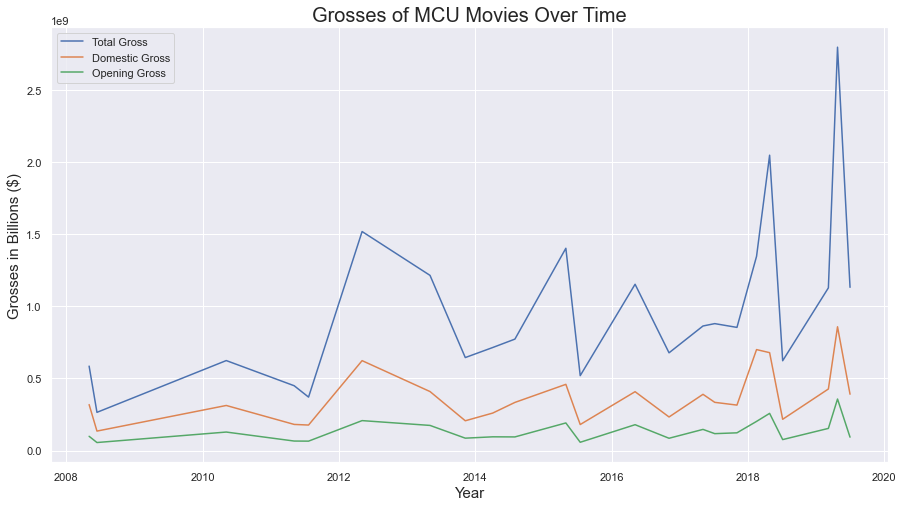

In [711]:
fig, ax = plt.subplots()
ax.set_xlabel("Year", fontsize = 15)
ax.set_ylabel("Grosses in Billions ($)", fontsize = 15)
ax.set_title("Grosses of MCU Movies Over Time", fontsize = 20)

ax = sns.lineplot(x=mcu.US_release_Date, y=mcu.Total_Gross)
ax1 = sns.lineplot(x=mcu.US_release_Date, y=mcu.Domestic_Gross)
ax2 = sns.lineplot(x=mcu.US_release_Date, y=mcu.Opening_Gross)
plt.legend(labels=["Total Gross","Domestic Gross", "Opening Gross"])
sns.set(rc = {'figure.figsize':(15,8)})

The graph reveals that the franchise really started gaining momentum after the release of _The Avengers_ in May 2012. Then, it hits a slump, which makes sense after the end of a phase. It spikes again for the end of Phase Two (_Avengers: Age of Ultron_: May 2015) and then again for _Captain America: Civil War_ and the two major blockbusters, _Avengers: Infinity War_ and _Avengers: Endgame_. This data indicates that the MCU's popularity has grown over time (shown by the general positive slope of all lines), but people are most interested in the films that feature many superheroes at once.

Now, let's take a look at the IMDb ratings of each movie and see which ones viewers enjoy the most. Do they change over time?

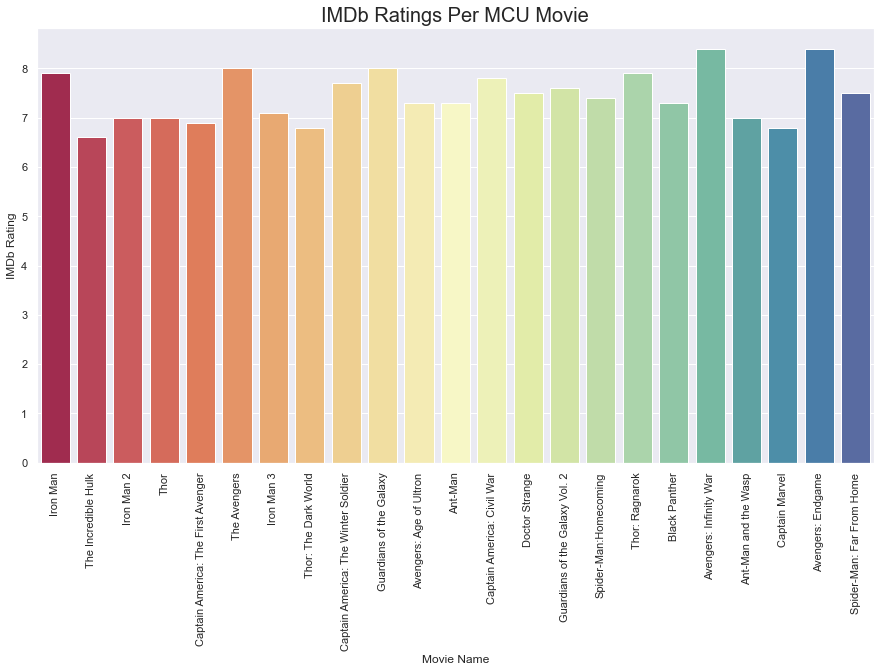

In [712]:
bplot = sns.barplot(x=mcu['Name'], y=mcu['IMDB_rating'], palette="Spectral")
bplot.set_xticklabels(bplot.get_xticklabels(),rotation = 90)
bplot.set(xlabel='Movie Name', ylabel='IMDb Rating')
bplot.set_title("IMDb Ratings Per MCU Movie", fontsize = 20)
sns.set(rc = {'figure.figsize':(15,8)})

Hmm, it appears that ratings fluctuates between 6 and 9 throughout the entire MCU timeline, with _Avengers: Infinity War_ and _Avengers: Endgame_ have the highest ones. That makes sense, considering how highly anticipated these films were and how they became the culmination of years of narrative and world-building. What about metascore, or the reviews given by critics?

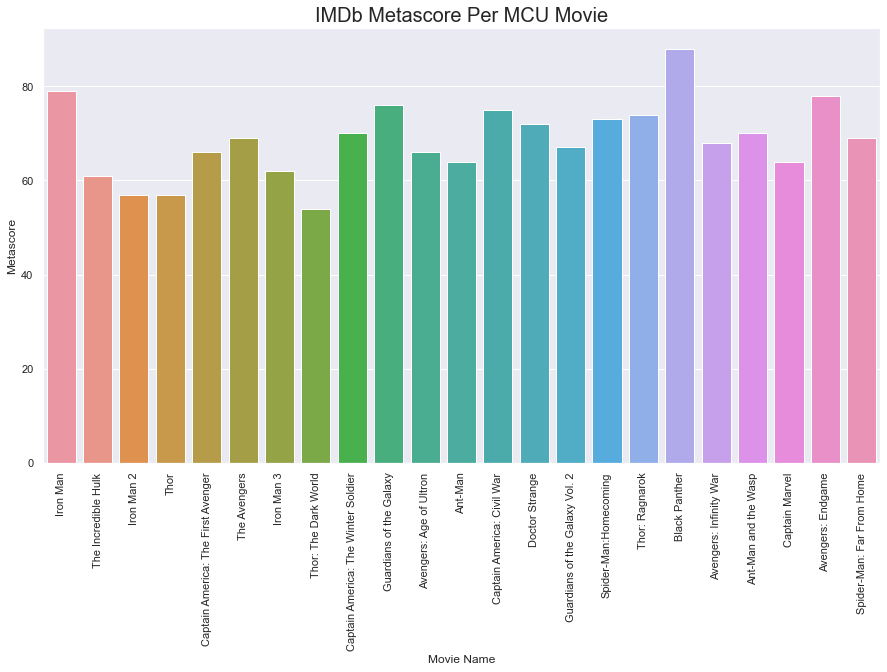

In [713]:
bplot = sns.barplot(x=mcu['Name'], y=mcu['metascore'])
bplot.set_xticklabels(bplot.get_xticklabels(),rotation = 90)
bplot.set(xlabel='Movie Name', ylabel='Metascore')
bplot.set_title("IMDb Metascore Per MCU Movie", fontsize = 20)
sns.set(rc = {'figure.figsize':(15,8)})

It looks like the critics slightly disagree with those ratings. It seems that they prefer movies that make the largest cultural impact on the world. With the highest metascore, _Black Panther_ made a huge impression on audiences with its mostly black cast and celebration of African culture. By telling African American stories and placing black people as heroes rather than sidekicks, it sent a powerful message about the importance of representation and the bias within the entertainment industry and in America. _Iron Man_ came in second as the movie that started the entire franchise, and _Avengers: Endgame_ came in third as the movie that thousands of people flocked to theaters to see as the finale of a narrative that had been unfolding for almost 10 years. 

Next, let's take a closer look at these movies, specifically at the people involved in making them. Focusing on the actors first, who makes the most appearances? Who plays the largest role in the MCU?

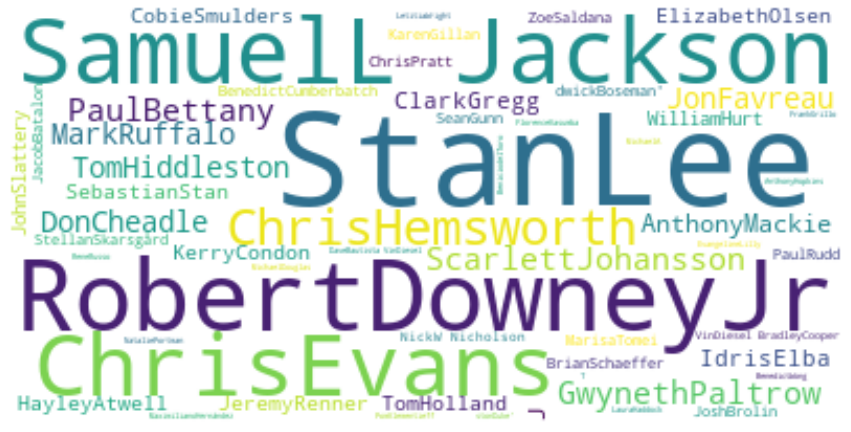

In [748]:
# make string of actor names -> eg. "name1 name2 name3 name1 name2 name 4..."
actors = ""
for i in range(len(mcu)):
    cast_dict = mcu.loc[i, 'cast']
    for key in cast_dict:
        string = cast_dict[key]['actor'].replace(' ', '') # remove spaces in actor names
        actors += string + " "

wordcloud = WordCloud(background_color ='white').generate(actors)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Looking at this wordcloud, the actor with the most appearances is Stan Lee. While he does not play a specific character, he is argubly the most iconic figure in the MCU as the executive vice president of Marvel Comics and the co-creator of many of the most popular heroes we know today such as Iron Man and Spider-Man. Furthermore, one can trace the evolution of the franchise through the cameos he has made in almost every Marvel movie from Phase One to Phase Three. What started out as a stipulation within his contract (to appear in every movie his characters did) turned into a staple that countless of viewers looked forward to discovering at every newly-released MCU film (Source: [IMDb](https://www.imdb.com/name/nm0498278/)). 

After Stan Lee is Robert Downey Jr., Samuel L. Jackson, and Chris Evans. All three actors play major characters within the MCU (Iron Man, Nick Fury, and Captain America respectively), and they appear in several movies as indicated by the size of their names. This hints at how the MCU weaves different heroes' stories together through a handful of main characters. 

Also notice how the presence of male actors overshadows that of the females. The two largest female names, Gwyneth Paltrow and Scarlett Johansson, are at least half of the largest male names. 

Let's explore this further. How do the characters that these actors play interact over time? How do these different movies and narratives connect with each other? How does gender representation within the MCU shift with each phase?

## The Network of the MCU

To answer these questions, let's use a network graph. First, I need to set up a Graph and a couple of functions to help us create the nodes and edges.

In [733]:
G = nx.Graph()
labels = {}
nodelist = []
nodesize = []
nodecolor = []
gendercolor = []

In [734]:
colors = {'Iron Man': '#db483b', 'The Incredible Hulk': '#b84659', 'Iron Man 2': '#cb5c5e', 'Thor': '#d56b5b', \
            'Captain America: The First Avenger': '#df7d5b', 'The Avengers': '#e49467', 'Iron Man 3': '#e8a972', \
            'Thor: The Dark World': '#ecbd81', 'Captain America: The Winter Soldier': '#eecf91', \
            'Guardians of the Galaxy': '#f1dea1', 'Avengers: Age of Ultron': '#f4ebb4', 'Ant-Man': '#f7f7c6', \
            'Captain America: Civil War': '#edf1b8', 'Doctor Strange': '#e2eca9', 'Guardians of the Galaxy Vol. 2': '#d2e4a6', \
            'Spider-Man:Homecoming': '#c0dca9', 'Thor: Ragnarok': '#abd4ab', 'Black Panther': '#90c6a6', \
            'Avengers: Infinity War': '#77b9a2', 'Ant-Man and the Wasp': '#5fa2a2', 'Captain Marvel': '#4d8ea8', \
            'Avengers: Endgame': '#4a7da8', 'Spider-Man: Far From Home': '#596ba1'}

def get_color(string):
    """ Get color based on movie name or gender number
    
    Keyword Arguments:
    string -- a string containing the movie name or gender number
    
    Returns: the color associated with the movie/gender
    """
    if string == '0':
        return 'orange'
    elif string == '1':
        return 'pink'
    elif string == '2':
        return '#03cffc'
    return colors[string]

In [735]:
def get_abbr(string):
    """ Abbreviates character's name for network graph by taking first letter of each name
    
    Keyword Arguments:
    string -- a string containing a character's name
    
    Returns: abbreviation of character's name
    """
    arr = string.split(' ')
    abbr = ""
    for i in arr:
        if i[0:1].isalnum() or i[0:1] == '/':
            abbr += i[0:1]
    return abbr

In [736]:
def add_nodes(title, dictionary, num):
    """ Adds nodes and edges for each movie
    
    Keyword Arguments:
    title -- a string containing the title of the movie
    dictionary -- a dict containing the crew data
    num -- an integer with the number of nodes to draw
    """
        
    characters = list(dictionary.keys())
    characters = characters[0:num]

    # add nodes if it does not already exist
    for char in characters:
        if char not in labels:
            labels[char] = get_abbr(char)
            
            # add colors to appropriate lists
            nodecolor.append(get_color(title))
            if dictionary[char]['gender'].isnumeric():
                gendercolor.append(get_color(dictionary[char]['gender']))
            else:
                gendercolor.append('orange')
                
            nodesize.append(0)
            nodelist.append(char)
            G.add_nodes_from(char)

    # add edges between all nodes and increase size of nodes for every edge created
    for char in characters:
        for c in characters:
            if char != c:
                if char not in nodelist or c not in nodelist:
                    continue
                index1 = nodelist.index(char)
                index2 = nodelist.index(c)
                nodesize[index1] += 10
                nodesize[index2] += 10
                G.add_edge(char, c)

There! Now, it all began with _Iron Man_ in 2008, when billionaire and inventor Tony Stark builds an iron suit to escape terrorists looking to build a terrible weapon created by his company. 

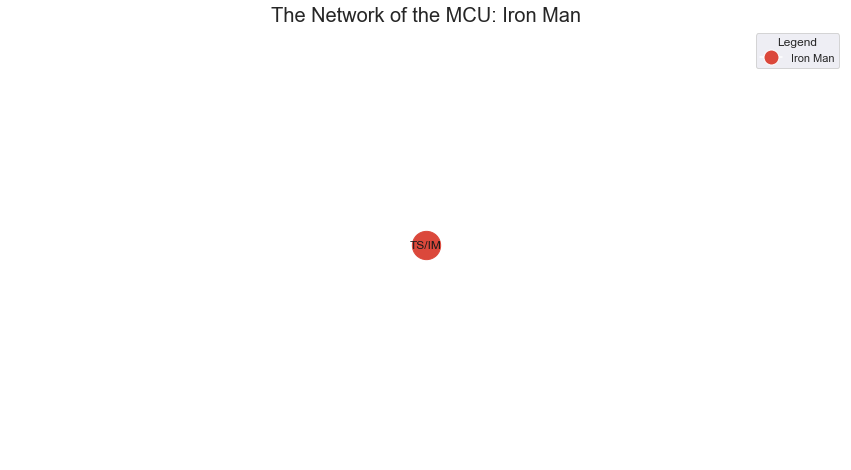

In [737]:
title = mcu.loc[0, 'Name']
iron_man = mcu.loc[0, 'cast']
character = list(iron_man.keys())[0]
abbr = get_abbr(character)

if character not in labels:
    labels[character] = abbr
    nodecolor.append(get_color(title))
    nodesize.append(800)
    nodelist.append(character)
    gendercolor.append(get_color(iron_man[character]['gender']))

    G.add_node(character)
    
plt.title("The Network of the MCU: Iron Man", fontsize=20)
plt.legend(handles=char_legend[0:1], title="Legend")
nx.draw(G, with_labels=True, labels=labels, node_color=nodecolor, node_size=nodesize, nodelist=nodelist)

This is a node representing Tony Stark/Iron Man. The red color indicates that the character first made an appearance in _Iron Man_. Let's add the other characters and connect them all to each other since they belong to the same movie. Note: I will only be adding 25 characters from each movie to avoid overwhelming the graph.

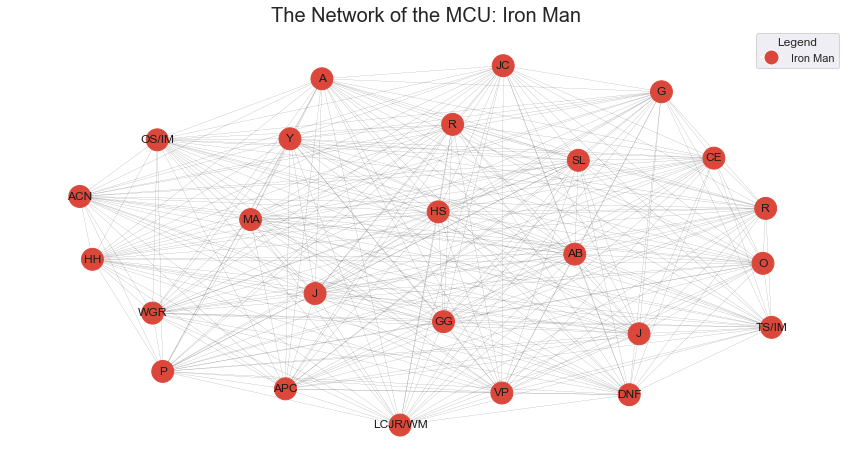

In [738]:
add_nodes(mcu.loc[0, 'Name'], mcu.loc[0, 'cast'], 25)

if len(nodesize) > 1:
    nodesize[0] = nodesize[1]

plt.title("The Network of the MCU: Iron Man", fontsize=20)
plt.legend(handles=char_legend[0:1], title="Legend")
nx.draw(G, with_labels=True, labels=labels, node_color=nodecolor, node_size=nodesize, nodelist=nodelist, width=0.1)

That's a lot of connections! Some additional important characters include Lieutenant Colonel James Rhodes a.k.a. War Machine (LCJR/WM), Howard Stark (HS), Director Nick Fury (DNF), and two of the MCU's first major female characters, Virginia "Pepper" Potts (VP) and Agent Peggy Carter (APC). I expect these characters' nodes to increase in the following graphs. 

Let's see what happens when we add all the other origin story movies in Phase 1.

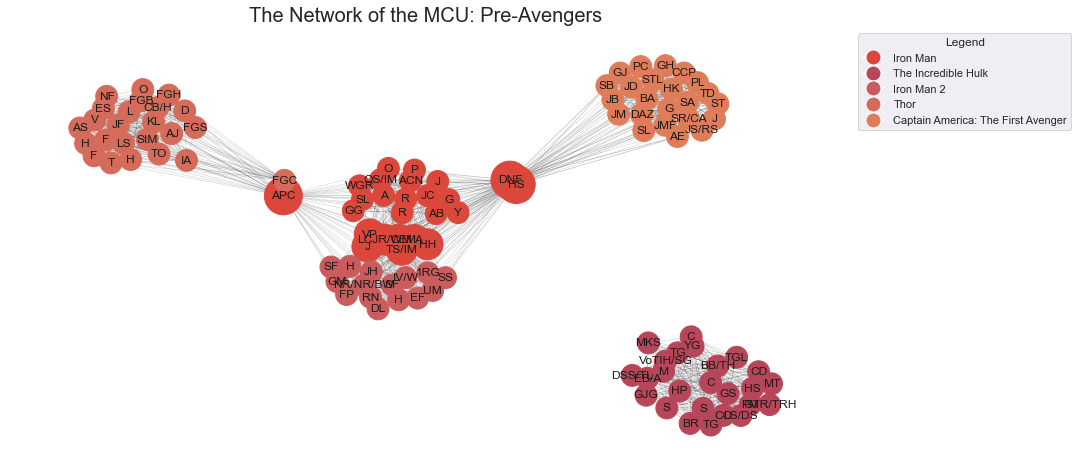

In [739]:
# get all phase 1 movies except for iron man and avengers
query = mcu[mcu.Phase == 1]
query = query[query.Name != 'Iron Man']
query = query[query.Name != 'The Avengers']
index = list(query.index)

for i in index:
    add_nodes(mcu.loc[i, 'Name'], mcu.loc[i, 'cast'], 25)

pos = nx.spring_layout(G, k=0.2, iterations=20)
plt.title("The Network of the MCU: Pre-Avengers", fontsize=20)
plt.legend(handles=char_legend[0:len(mcu[mcu.Phase == 1])-1], title="Legend", bbox_to_anchor=(1.01, 1))
nx.draw(G, pos, with_labels=True, labels=labels, node_color=nodecolor, node_size=nodesize, nodelist=nodelist, width=0.1)

As you can see, the MCU began with 5 movies that were only connected by a few characters such as Iron Man (TS/IM), Peggy Carter (APC), Nick Fury (DNF), and Howard Stark (HS). _The Incredible Hulk_ (identified by the maroon cluster with BB/TH for Bruce Banner / The Hulk) has no connections at all. But then _The Avengers_ is released.

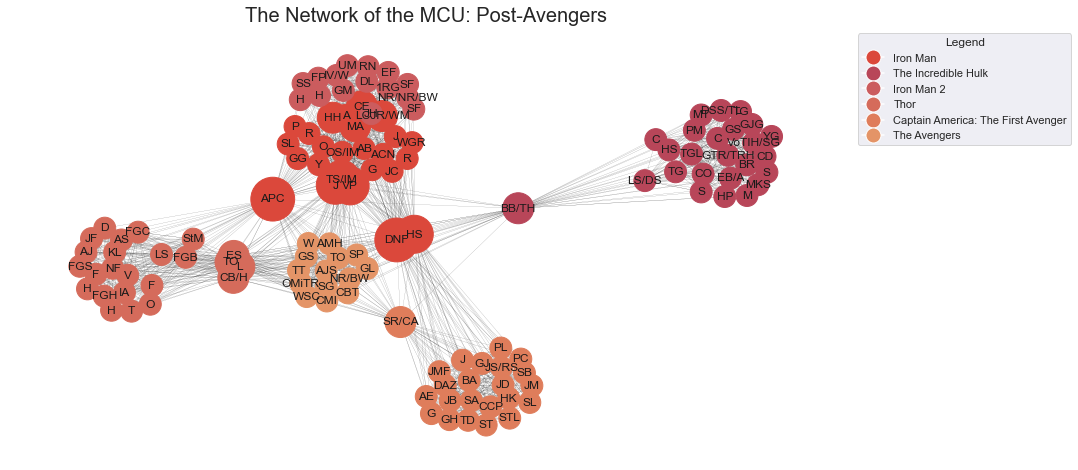

In [740]:
# add avengers characters
add_nodes(mcu.loc[5, 'Name'], mcu.loc[5, 'cast'], 25)

pos = nx.spring_layout(G, k=0.2, iterations=20)
plt.title("The Network of the MCU: Post-Avengers", fontsize=20)
plt.legend(handles=char_legend[0:len(mcu[mcu.Phase == 1])], title="Legend", bbox_to_anchor=(1.01, 1))
nx.draw(G, pos, with_labels=True, labels=labels, node_color=nodecolor, node_size=nodesize, nodelist=nodelist, width=0.1)

With _The Avengers_, the MCU started coming together, which probably contributed to the spike shown earlier in the Grosses line graph. Main heroes such as The Hulk (BB/TH), Captain America (SR/CA), Thor Odinson (TO), and Iron Man (TS/IM) became bridges between clusters and rose in importance. The villian, Loki (L), also brings characters together as _The Avengers's_ main antagonist.

In [741]:
# create legend for gender graph
gender_legend = [Line2D([0], [0], marker='o', color='w', label='Male', markerfacecolor='#03cffc', markersize=15), \
                   Line2D([0], [0], marker='o', color='w', label='Female', markerfacecolor='pink', markersize=15), \
                    Line2D([0], [0], marker='o', color='w', label='Other/Unknown', markerfacecolor='orange', markersize=15)]

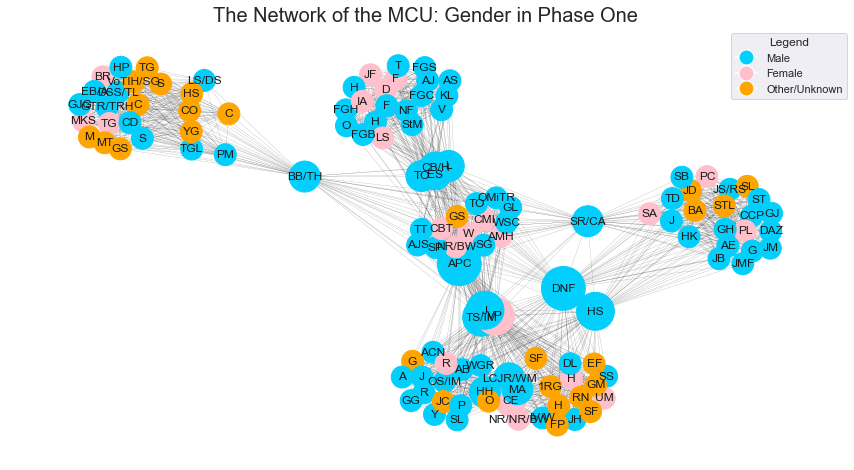

In [742]:
pos = nx.spring_layout(G, k=0.2, iterations=20)
plt.title("The Network of the MCU: Gender in Phase One", fontsize=20)
plt.legend(handles=gender_legend, title="Legend", bbox_to_anchor=(1.01, 1))
nx.draw(G, pos, with_labels=True, labels=labels, node_color=gendercolor, node_size=nodesize, nodelist=nodelist, width=0.1)

However, as you can see, Phase One of the MCU lacked in representation. All except one of the major characters are men (Virginia Potts (VP) being the only female), and there are only a few women in each cluster of characters. Note: the orange nodes indicate either other or unknown gender. The MCU dataset does not specify what this category means.

Let's see what changes in Phase Two.

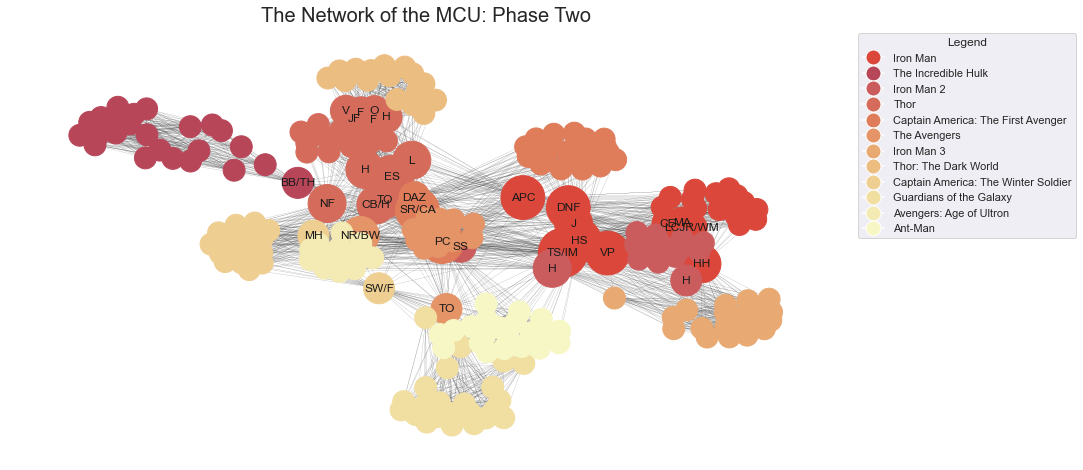

In [743]:
# get all phase 2 movies
query = mcu[mcu.Phase == 2]
index = list(query.index)

for i in index:
    add_nodes(mcu.loc[i, 'Name'], mcu.loc[i, 'cast'], 25)

# change labels so that only largest nodes get text on them
labels_copy = labels.copy()
keys = list(labels_copy.keys())
for key in keys:
    index = keys.index(key)
    if nodesize[index] < 500:
        labels_copy[key] = ""
    
pos = nx.spring_layout(G, k=0.2, iterations=20)
plt.title("The Network of the MCU: Phase Two", fontsize=20)
plt.legend(handles=char_legend[0:12], title="Legend", bbox_to_anchor=(1.01, 1))
nx.draw(G, pos, with_labels=True, labels=labels_copy, node_color=nodecolor, node_size=nodesize, nodelist=nodelist, width=0.1)

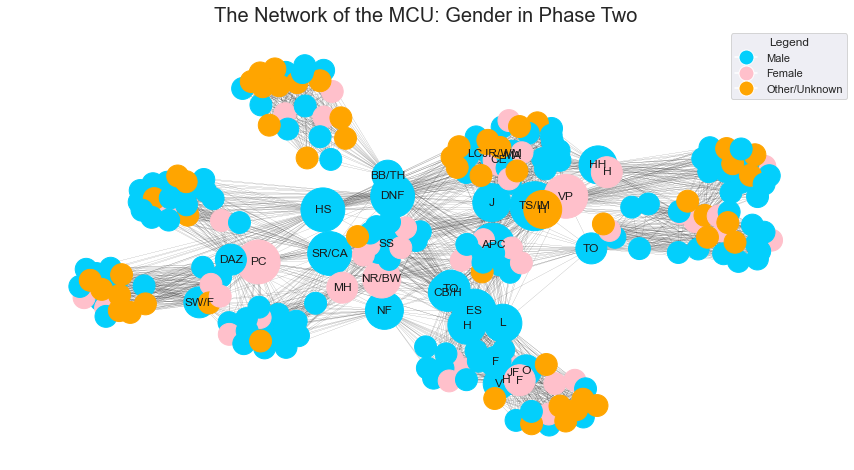

In [744]:
pos = nx.spring_layout(G, k=0.2, iterations=20)
plt.title("The Network of the MCU: Gender in Phase Two", fontsize=20)
plt.legend(handles=gender_legend, title="Legend", bbox_to_anchor=(1.01, 1))
nx.draw(G, pos, with_labels=True, labels=labels_copy, node_color=gendercolor, node_size=nodesize, nodelist=nodelist, width=0.1)

The universe is expanding! More and more heroes are being pulled into the middle, some of them being women. Others are newly introduced, making the amount of character abbreviations overwhelming, so I only kept the ones associated with the largest of the nodes. Therefore, we can focus more on the relationships between the nodes rather than the characters themselves. Most of the ones with text remaining are still men, but there are a few more women being included. Furthermore, you can see how most of the Phase One characters becoming more entangled together, while the ones in the newer origin stories are still clustered together at the edges (e.g. _Ant-Man_ and _Guardians of the Galaxy_)

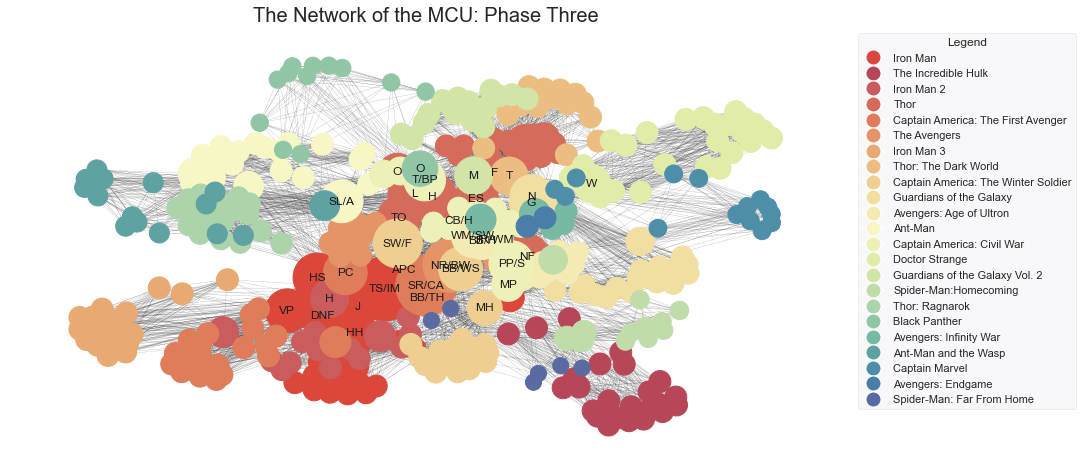

In [745]:
# get all phase 3 movies
query = mcu[mcu.Phase == 3]
index = list(query.index)

for i in index:
    add_nodes(mcu.loc[i, 'Name'], mcu.loc[i, 'cast'], 25)

# change labels so that only largest nodes get text on them
labels_copy = labels.copy()
keys = list(labels_copy.keys())
for key in keys:
    index = keys.index(key)
    if nodesize[index] < 1000:
        labels_copy[key] = ""
    
pos = nx.spring_layout(G, k=0.2, iterations=20)
plt.title("The Network of the MCU: Phase Three", fontsize=20)
plt.legend(handles=char_legend, title="Legend", framealpha=0.3, bbox_to_anchor=(1.01, 1))
nx.draw(G, pos, with_labels=True, labels=labels_copy, node_color=nodecolor, node_size=nodesize, nodelist=nodelist, width=0.1)


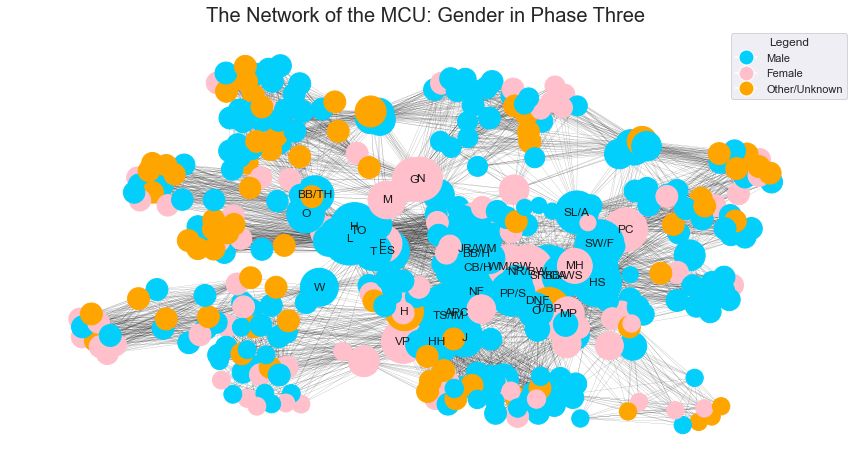

In [746]:
pos = nx.spring_layout(G, k=0.2, iterations=20)
plt.title("The Network of the MCU: Gender in Phase Three", fontsize=20)
plt.legend(handles=gender_legend, title="Legend", bbox_to_anchor=(1.01, 1))
nx.draw(G, pos, with_labels=True, labels=labels_copy, node_color=gendercolor, node_size=nodesize, nodelist=nodelist, width=0.1)

By the end of Phase Three, my graph is a huge splash of colors, with many heroes from different narratives of the MCU come together in the center for the finale, _Avengers: Endgame_. We still see some clusters on the edges that indicate that some characters stayed within a single movie, but for the most part, the MCU network is beginning to look more like a complicated net. Looking at the gender graph, we see a lot more women getting in on the action such as Wanda Maximoff a.k.a. Scarlett Witch (WM/SW),  Mantis (M) from _Guardians of the Galaxy 2_, and Okoye (O) from _Black Panther_. Though male appearances still outnumber females, the MCU is increasing the number of women characters on screen. Promising. 

## Final Thoughts

Within eleven years, twenty-two movies, and three phases, the Marvel Cinematic Universe has grown into a very popular franchise with millions of fans and developed several different narratives that culiminated into one epic final showdown. During this time, its movie grosses has increased overall, and ratings remain high. Audiences have developed a liking to movies that showcased many heroes at once, while critics enjoy the ones that make a significant impact. However, there are still some room for improvements. Though the MCU has been increasing the number of women being featured in its movies over Phases 1-3, the males still significantly outnumber the females, both in number and screen time. Unfortunately, the dataset does not specify whether or not the orange nodes are unknown or other genders, but through my own experiences, Marvel certainly could and should improve upon its representation of characters of other genders. 

Furthermore, while not discussed thouroughly due to lack of information, the MCU has also begun improving upon racial representation, as shown through _Black Panther_ and more recently, _Shang-Chi and the Legend of the Ten Rings_.

Perhaps, as we enter into Phase Four, the MCU will continue to improve upon its diversity and inclusion of both race and gender while expanding the facinating network of the Marvel Cinematic Universe.